## Basic Example

In [1]:
import ug100
import torch
import torchvision
import matplotlib.pyplot as plt

Load both the MNIST test set and the approximate adversarials

In [2]:
genuine_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
adversarial_dataset = ug100.UG100ApproximateAdversarial(dataset='mnist', architecture='a', training_type='standard')
multi_dataset = ug100.MultiDataset(genuine_dataset, adversarial_dataset)

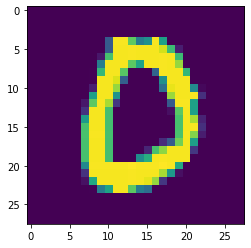

In [3]:
index = 6342
genuine, label = genuine_dataset[index]
plt.imshow(genuine.numpy().squeeze())

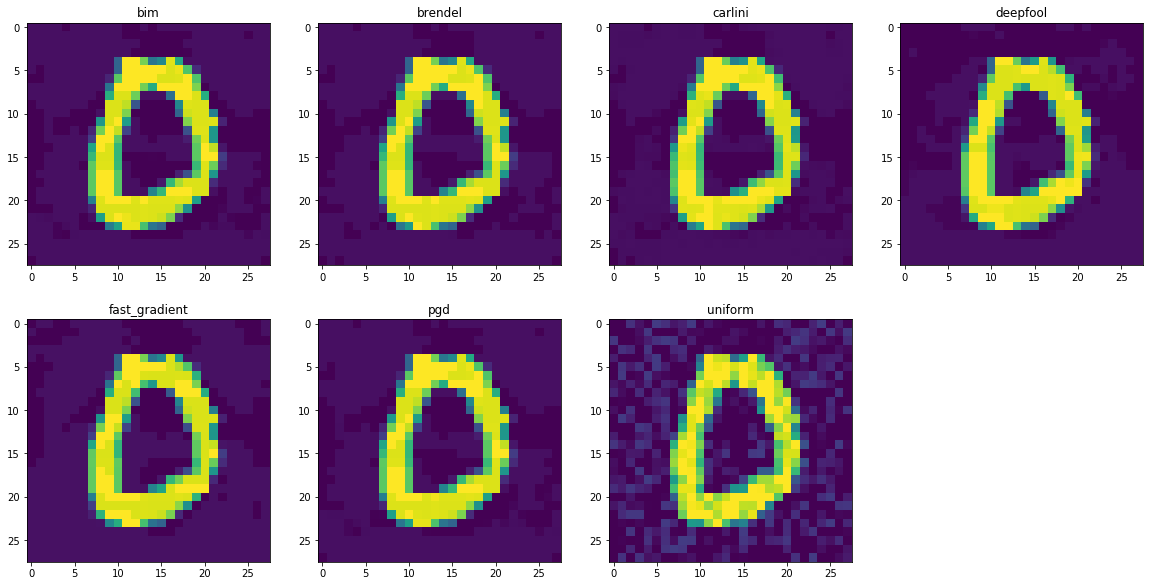

In [4]:
adversarials = adversarial_dataset[index]
plt.figure(figsize=(20, 10))
for i, (attack_name, adversarial) in enumerate(adversarials.items()):
    plt.subplot(2, 4, i + 1, title=attack_name)
    plt.imshow(adversarial.numpy().squeeze())

## Multi-datasets

You can combine datasets by using `ug100.MultiDataset`. Note that `MultiDataset` will NOT check during the moment of creation if all datasets support all indices. For this reason, if one dataset contains an element with a certain index and another doesn't, trying to access that index will raise an exception.

In [5]:

(m_genuine, m_label), m_adversarials = multi_dataset[index]
assert torch.eq(m_genuine, genuine).all()
assert m_label == label
assert m_adversarials == adversarials

In [6]:
# MNIST has an element for index #0, but UG100 doesn't
import traceback
try:
    _ = multi_dataset[0]
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-6-5026e5d91c81>", line 4, in <module>
    _ = multi_dataset[0]
  File "c:\Users\Samuele\Anaconda3\lib\site-packages\ug100\dataset.py", line 419, in __getitem__
    return [dataset[index] for dataset in self.datasets]
  File "c:\Users\Samuele\Anaconda3\lib\site-packages\ug100\dataset.py", line 419, in <listcomp>
    return [dataset[index] for dataset in self.datasets]
  File "c:\Users\Samuele\Anaconda3\lib\site-packages\ug100\dataset.py", line 221, in __getitem__
    element = super().__getitem__(index)
  File "c:\Users\Samuele\Anaconda3\lib\site-packages\ug100\dataset.py", line 163, in __getitem__
    return self.data[index]
KeyError: 0


## Indexing

If you need to access adversarials in a dense manner, consider using `ug100.IndexedDataset`.

In [7]:
indexed_dataset = ug100.IndexedDataset(adversarial_dataset)
assert indexed_dataset[0] == adversarial_dataset[252]
assert indexed_dataset[1] == adversarial_dataset[258]

## Other datasets

In [8]:
distance_dataset = ug100.UG100ApproximateDistance(dataset='mnist', architecture='b', training_type='adversarial')
print(distance_dataset[6342])

{'bim': 0.16158345341682434, 'brendel': 0.14028358459472656, 'deepfool': 0.17196640372276306, 'fast_gradient': 0.2278476059436798, 'pgd': 0.15848413109779358, 'uniform': 0.6329113245010376, 'carlini': 0.15431466698646545}


In [9]:
bounds_dataset = ug100.UG100MIPBounds(dataset='cifar10', architecture='a', training_type='standard')
print(bounds_dataset[2077])

{'lower': 0.007459416860477277, 'upper': 0.007545949684025845}


In [10]:
time_dataset = ug100.UG100MIPTime(dataset='cifar10', architecture='c', training_type='relu')
print(time_dataset[2077])

212.57220149040222
